 ## Ebay Delivery Date Estimation

### Importing the necessary libraries

In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn import svm
import numpy as np

### Reading Raw Data

'''tsv_file = open("C:\\SJSUDocs\\CS171IntroTo MI\\Project\\eBay_ML_Challenge_Dataset_2021\\train.tsv")
csv_file= csv.reader(tsv_file, delimiter="\t") --->> Another method to read tsv file.'''

In [2]:
df=pd.read_csv("C:\\SJSUDocs\\CS171IntroTo MI\\Project\\eBay_ML_Challenge_Dataset_2021\\train.tsv",sep = '\t')

In [3]:
pd.set_option('display.max_rows',1000)
df.head(1000)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.00,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.00,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.50,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.00,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.00,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5
5,B2C,10514,1.0,2019-04-19 19:42:00.000-04:00,0,0.00,3,5,43215,77063,3,10.39,1,2019-04-18 14:11:09.000-04:00,2019-04-22,1,1,PACKAGE_THICK_ENVELOPE,6
6,B2C,104,1.0,2019-02-08 17:35:00.000-08:00,0,0.00,3,5,91304,60565,11,5.70,1,2019-02-08 09:33:13.000-08:00,2019-02-11,0,1,PACKAGE_THICK_ENVELOPE,7
7,B2C,340356,1.0,2018-04-23 17:31:00.000-04:00,0,2.95,3,5,49735,29379,1,6.00,1,2018-04-22 18:32:04.000-04:00,2018-04-25,1,1,PACKAGE_THICK_ENVELOPE,8
8,B2C,113915,5.0,2019-10-12 09:22:00.000-04:00,3,0.00,2,8,43606,32958,18,5.55,1,2019-10-11 04:54:25.000-04:00,2019-10-15,0,1,NONE,9
9,B2C,130301,1.0,2019-08-09 11:24:00.000-05:00,1,0.00,2,5,35117,84776,13,59.98,1,2019-08-08 12:47:14.000-05:00,2019-08-12,112,1,PACKAGE_THICK_ENVELOPE,10


### Selecting 100,000 records

In [4]:
df_short=df.iloc[0:100000,:]   ## Using 1000 records,as the file contains 15 million records, operations take long time to finish.
print("Number of rows and columns in the data frame are: ",df_short.shape)
print("The data types of each column are:")
print(df_short.dtypes)

Number of rows and columns in the data frame are:  (100000, 19)
The data types of each column are:
b2c_c2c                       object
seller_id                      int64
declared_handling_days       float64
acceptance_scan_timestamp     object
shipment_method_id             int64
shipping_fee                 float64
carrier_min_estimate           int64
carrier_max_estimate           int64
item_zip                      object
buyer_zip                     object
category_id                    int64
item_price                   float64
quantity                       int64
payment_datetime              object
delivery_date                 object
weight                         int64
weight_units                   int64
package_size                  object
record_number                  int64
dtype: object


In [5]:
df_copy=df_short  ## Saving the original copy

### Data Cleaning

#### Checking missing values, Replacing null and unusual values with mean, bfill , dropping some records.

In [6]:
## Before replacing NONE values.
print(df_copy['package_size'].value_counts())

## Here mode of PACKAGE_THICH_ENVELOPE is 89116, therefore replacing the NONE values with that
row =0
col=df_copy['package_size']
for p in col:
    if p == "NONE":
        df_copy.at[row,'package_size'] = "PACKAGE_THICK_ENVELOPE"
        row = row+1
    else:
        row = row+1
## After replacing the NONE values.
print("\nAfter replacing null and invalid values.\n")
print(df_copy['package_size'].value_counts()) 

PACKAGE_THICK_ENVELOPE    84468
NONE                       7065
LETTER                     5787
LARGE_ENVELOPE             1495
LARGE_PACKAGE              1185
Name: package_size, dtype: int64

After replacing null and invalid values.

PACKAGE_THICK_ENVELOPE    91533
LETTER                     5787
LARGE_ENVELOPE             1495
LARGE_PACKAGE              1185
Name: package_size, dtype: int64


In [7]:
## df['weight_units']
##print(df_copy['weight_units'].value_counts())
print("Number of Missing values in df_copy['weight_units'] : ",df_copy['weight_units'].isna().sum())
print("No missing values or wrong data in column df_copy['weight_units'] \n ")


##df['weight']
##print(df_copy['weight'].value_counts())
print("The sum of all the values for column df_copy['weight'] is: ",df_copy['weight'].value_counts().sum())
print("No cleaning of data is required for df_copy['weight'] column.\n")


##df_copy['payment_datetime']
print("Number of Missing values for column df_copy['payment_datetime']: ",df_copy['payment_datetime'].isna().sum())
## Checking the length of the string objects in the column.
for delDate in df_copy['payment_datetime']:
    if len(delDate) != 29:
        index = df_copy.index[df_copy['payment_datetime'] == delDate]
        df_copy.drop(index,inplace=True)
print("The shape of dataframe after dropping the records in column df_copy['payment_datetime'] : ",df_copy.shape,"\n")


##df_copy['quantity']  and df_copy['category_id']
##print(df_copy['quantity'].value_counts())
print("The sum of all the values for df_copy['quantity'] is: ",df_copy['quantity'].value_counts().sum())
print("Number of Missing values for df_copy['quantity'] is: ",df_copy['quantity'].isna().sum())
print("No cleaning of data is required for df_copy['quantity'] column. \n")


##print(df_copy['category_id'].value_counts())
print("The sum of all the values for df_copy['category_id'] is: ",df_copy['category_id'].value_counts().sum())
print("Number of Missing values for df_copy['category_id']: \n",df_copy['category_id'].isna().sum())


##df_copy['item_price'] 
## Here checking if the values are: 1) missing or not 2) Float or not. 3) Positive or not
## We will replace the unusal values with the mean.
print("Number of Missing values for df_copy['item_price']: ",df_copy['item_price'].isna().sum())
itemPriceMean=df['item_price'].mean()
print("Mean is: ",itemPriceMean)

row=0
for delDate in df_copy['item_price']:
    check_float = isinstance(delDate, float)
    if check_float == False or delDate < 0 :
        df_copy.at[row,'item_price'] = itemPriceMean
        row=row+1
    else:
        row = row+1
        
##df_copy['buyer_zip'] and df_Copy['item_zip']
## Checking if it has missing values or not
print("Number of Missing values for df_copy['buyer_zip']: ",df_copy['buyer_zip'].isna().sum())
print("Number of Missing values for df_copy['item_zip']: ",df_copy['item_zip'].isna().sum())

## Checking if: 
##         1) The size of zip code is greater than 5 and 2) if all are not digits then,
##             Drop the rows 
for delDate in df_copy['buyer_zip']:
    if len(delDate) != 5 or delDate.isdigit() == False:
        index = df_copy.index[df_copy['buyer_zip'] == delDate]
        df_copy.drop(index,inplace = True)
print("The shape of dataframe after dropping the rows : ",df_copy.shape,"\n")



for delDate in df_copy['item_zip']:
    if len(delDate) != 5 or delDate.isdigit() == False:
        ind = df_copy.index[df_copy['item_zip'] == delDate]
        df_copy.drop(ind,inplace = True)
print("The shape of dataframe after dropping the rows: ",df_copy.shape,"\n")


Number of Missing values in df_copy['weight_units'] :  0
No missing values or wrong data in column df_copy['weight_units'] 
 
The sum of all the values for column df_copy['weight'] is:  100000
No cleaning of data is required for df_copy['weight'] column.

Number of Missing values for column df_copy['payment_datetime']:  0
The shape of dataframe after dropping the records in column df_copy['payment_datetime'] :  (100000, 19) 

The sum of all the values for df_copy['quantity'] is:  100000
Number of Missing values for df_copy['quantity'] is:  0
No cleaning of data is required for df_copy['quantity'] column. 

The sum of all the values for df_copy['category_id'] is:  100000
Number of Missing values for df_copy['category_id']: 
 0
Number of Missing values for df_copy['item_price']:  0
Mean is:  36.13771060924862
Number of Missing values for df_copy['buyer_zip']:  0
Number of Missing values for df_copy['item_zip']:  0


C:\Users\agraw\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


The shape of dataframe after dropping the rows :  (99316, 19) 

The shape of dataframe after dropping the rows:  (97104, 19) 



In [9]:
## df_copy['carrier_max_estimate']
## Check if any missing value is there.
print("Number of Missing values for df_copy['carrier_max_estimate']: ",df_copy['carrier_max_estimate'].isna().sum())
print(df_copy['carrier_max_estimate'].value_counts())
print("The sum of all the values for df_copy['carrier_max_estimate'] is: ",df_copy['carrier_max_estimate'].value_counts().sum(),"\n")

##df_copy['carrier_min_estimate']
## Check if any missing value is there.
print("Number of Missing values for df_copy['carrier_min_estimate']: ",df_copy['carrier_min_estimate'].isna().sum())
print(df_copy['carrier_min_estimate'].value_counts())
print("The sum of all the values for df_copy['carrier_min_estimate'] is: ",df_copy['carrier_min_estimate'].value_counts().sum(),"\n")


##df_copy['shipment_method_id']
print("Number of Missing values for df_copy['shipment_method_id'] is: ",df_copy['shipment_method_id'].isna().sum())
print(df_copy['shipment_method_id'].value_counts())
print("The sum of all the values for df_copy['shipment_method_id'] is: ",df_copy['shipment_method_id'].value_counts().sum(),"\n")


##df_Copy['shipping_fee']
## Here checking if the values are: 1) missing or not 2) Float or not. 3) Positive or not
## We will replace the unusal values with the mean.
print("Number of Missing values for df_copy['shipping_fee'] is: ",df_copy['shipping_fee'].isna().sum())
##print(df_copy['shipping_fee'].value_counts())
print("The sum of all the values for df_copy['shipping_fee'] is: ",df_copy['shipping_fee'].value_counts().sum())
shippingFeeMean=df['shipping_fee'].mean()
print("Mean is: ",shippingFeeMean)

rowShippingFee=0
numberOfRowsChanged=0
for delDate in df_copy['shipping_fee']:
    check_float = isinstance(delDate, float)
    if check_float == False or delDate < 0 :
        df_copy.at[rowShippingFee,'shipping_fee'] = shippingFeeMean
        numberOfRowsChanged = numberOfRowsChanged + 1
        rowShippingFee=rowShippingFee+1
    else:
        rowShippingFee = rowShippingFee+1
print("Number of rows changed for df_copy['shipping_fee']: ", numberOfRowsChanged,"\n")


##df_copy['acceptance_scan_timestamp']
## Checking the length of the string objects in the column.
print("Cleaning df_copy['acceptance_scan_timestamp'] column.")
for delDate in df_copy['acceptance_scan_timestamp']:
    if len(delDate) != 29:
        index = df_copy.index[df_copy['acceptance_scan_timestamp'] == delDate]
        df_copy.drop(index,inplace=True)
print("The shape of dataframe after dropping the records: ",df_copy.shape,"\n")


##df_copy['declared_handling_days']
## Here checking if the values are: 1) missing or not 2) Float or not. 3) Positive or not
## We will replace the unusal values with the mean.
print("Number of Missing values for df_copy['declared_handling_days']: ",df_copy['declared_handling_days'].isna().sum())
##print(df_copy['shipping_fee'].value_counts())
print("The sum of all the values is: ",df_copy['declared_handling_days'].value_counts().sum())

## Replacing the missing value with bfill command.
df_copy['declared_handling_days'].fillna( method ='bfill', inplace = True)
print("Number of Missing values after replacing: ",df_copy['declared_handling_days'].isna().sum())
print("The sum of all the values after replacing with bfill is: ",df_copy['declared_handling_days'].value_counts().sum())

##df_copy['seller_id']
## Check if any value is misssing or not
print("Number of Missing values for df_copy['seller_id']: ",df_copy['seller_id'].isna().sum())
print("The sum of all the values is: ",df_copy['seller_id'].value_counts().sum(),"\n")

##df_copy['b2c_c2c']
## check if missing or not
print("Number of Missing values for df_copy['b2c_c2c']: ",df_copy['b2c_c2c'].isna().sum())
print("The sum of all the values is: ",df_copy['b2c_c2c'].value_counts().sum())
print(df_copy['b2c_c2c'].value_counts(),"\n")

Number of Missing values for df_copy['carrier_max_estimate']:  0
 5     84235
 9      7425
 8      5387
 1        54
-1         2
 25        1
Name: carrier_max_estimate, dtype: int64
The sum of all the values for df_copy['carrier_max_estimate'] is:  97104 

Number of Missing values for df_copy['carrier_min_estimate']:  0
 3    59814
 2    37233
 1       49
 0        5
-1        2
 6        1
Name: carrier_min_estimate, dtype: int64
The sum of all the values for df_copy['carrier_min_estimate'] is:  97104 

Number of Missing values for df_copy['shipment_method_id'] is:  0
0     59813
1     19366
2      5445
3      5387
4      1980
5      1782
6      1143
7       914
8       818
9       243
10      155
11       35
13       14
15        5
12        2
14        1
24        1
Name: shipment_method_id, dtype: int64
The sum of all the values for df_copy['shipment_method_id'] is:  97104 

Number of Missing values for df_copy['shipping_fee'] is:  0
The sum of all the values for df_copy['shippin

### Correlation Analysis

#### Using describe function, corr function (pearson correlation) and paiplot graph.

In [10]:
## Provide descriptive statistics of variable.
df_copy.describe()

,seller_id,declared_handling_days,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,item_price,quantity,weight,weight_units,record_number
count,9.710400e+04,97104.000000,97104.000000,97104.000000,97104.000000,97104.000000,97104.000000,97104.000000,97104.000000,97104.000000,97104.0,97104.000000
mean,2.887870e+05,1.635144,0.900972,2.865874,2.615351,5.470145,6.722442,36.589834,1.102375,16.497456,1.0,50045.808999
std,6.936061e+05,1.480230,1.665304,5.493885,0.488247,1.231039,6.544989,97.672193,0.753376,66.819766,0.0,28852.204175
min,0.000000e+00,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.010000,1.000000,0.000000,1.0,1.000000
25%,6.160000e+03,1.000000,0.000000,0.000000,2.000000,5.000000,1.000000,8.950000,1.000000,0.000000,1.0,24977.750000
50%,4.426000e+04,1.000000,0.000000,0.000000,3.000000,5.000000,5.000000,15.780000,1.000000,4.000000,1.0,50135.500000
75%,2.275035e+05,2.000000,1.000000,4.000000,3.000000,5.000000,11.000000,31.500000,1.000000,16.000000,1.0,75061.250000
max,7.259890e+06,30.000000,24.000000,200.000000,6.000000,25.000000,32.000000,11000.000000,50.000000,11712.000000,1.0,99999.000000


In [11]:
## Correltion Analysis of variables
df_cor=df_copy.corr(method='pearson',min_periods=1)
print(df_cor.head())

                        seller_id  declared_handling_days  shipment_method_id  \
seller_id                1.000000                0.170094            0.072955   
declared_handling_days   0.170094                1.000000            0.058880   
shipment_method_id       0.072955                0.058880            1.000000   
shipping_fee             0.258995                0.129739            0.164273   
carrier_min_estimate    -0.173796               -0.096066           -0.690855   

                        shipping_fee  carrier_min_estimate  \
seller_id                   0.258995             -0.173796   
declared_handling_days      0.129739             -0.096066   
shipment_method_id          0.164273             -0.690855   
shipping_fee                1.000000             -0.328554   
carrier_min_estimate       -0.328554              1.000000   

                        carrier_max_estimate  category_id  item_price  \
seller_id                           0.046591     0.043411    0.1585

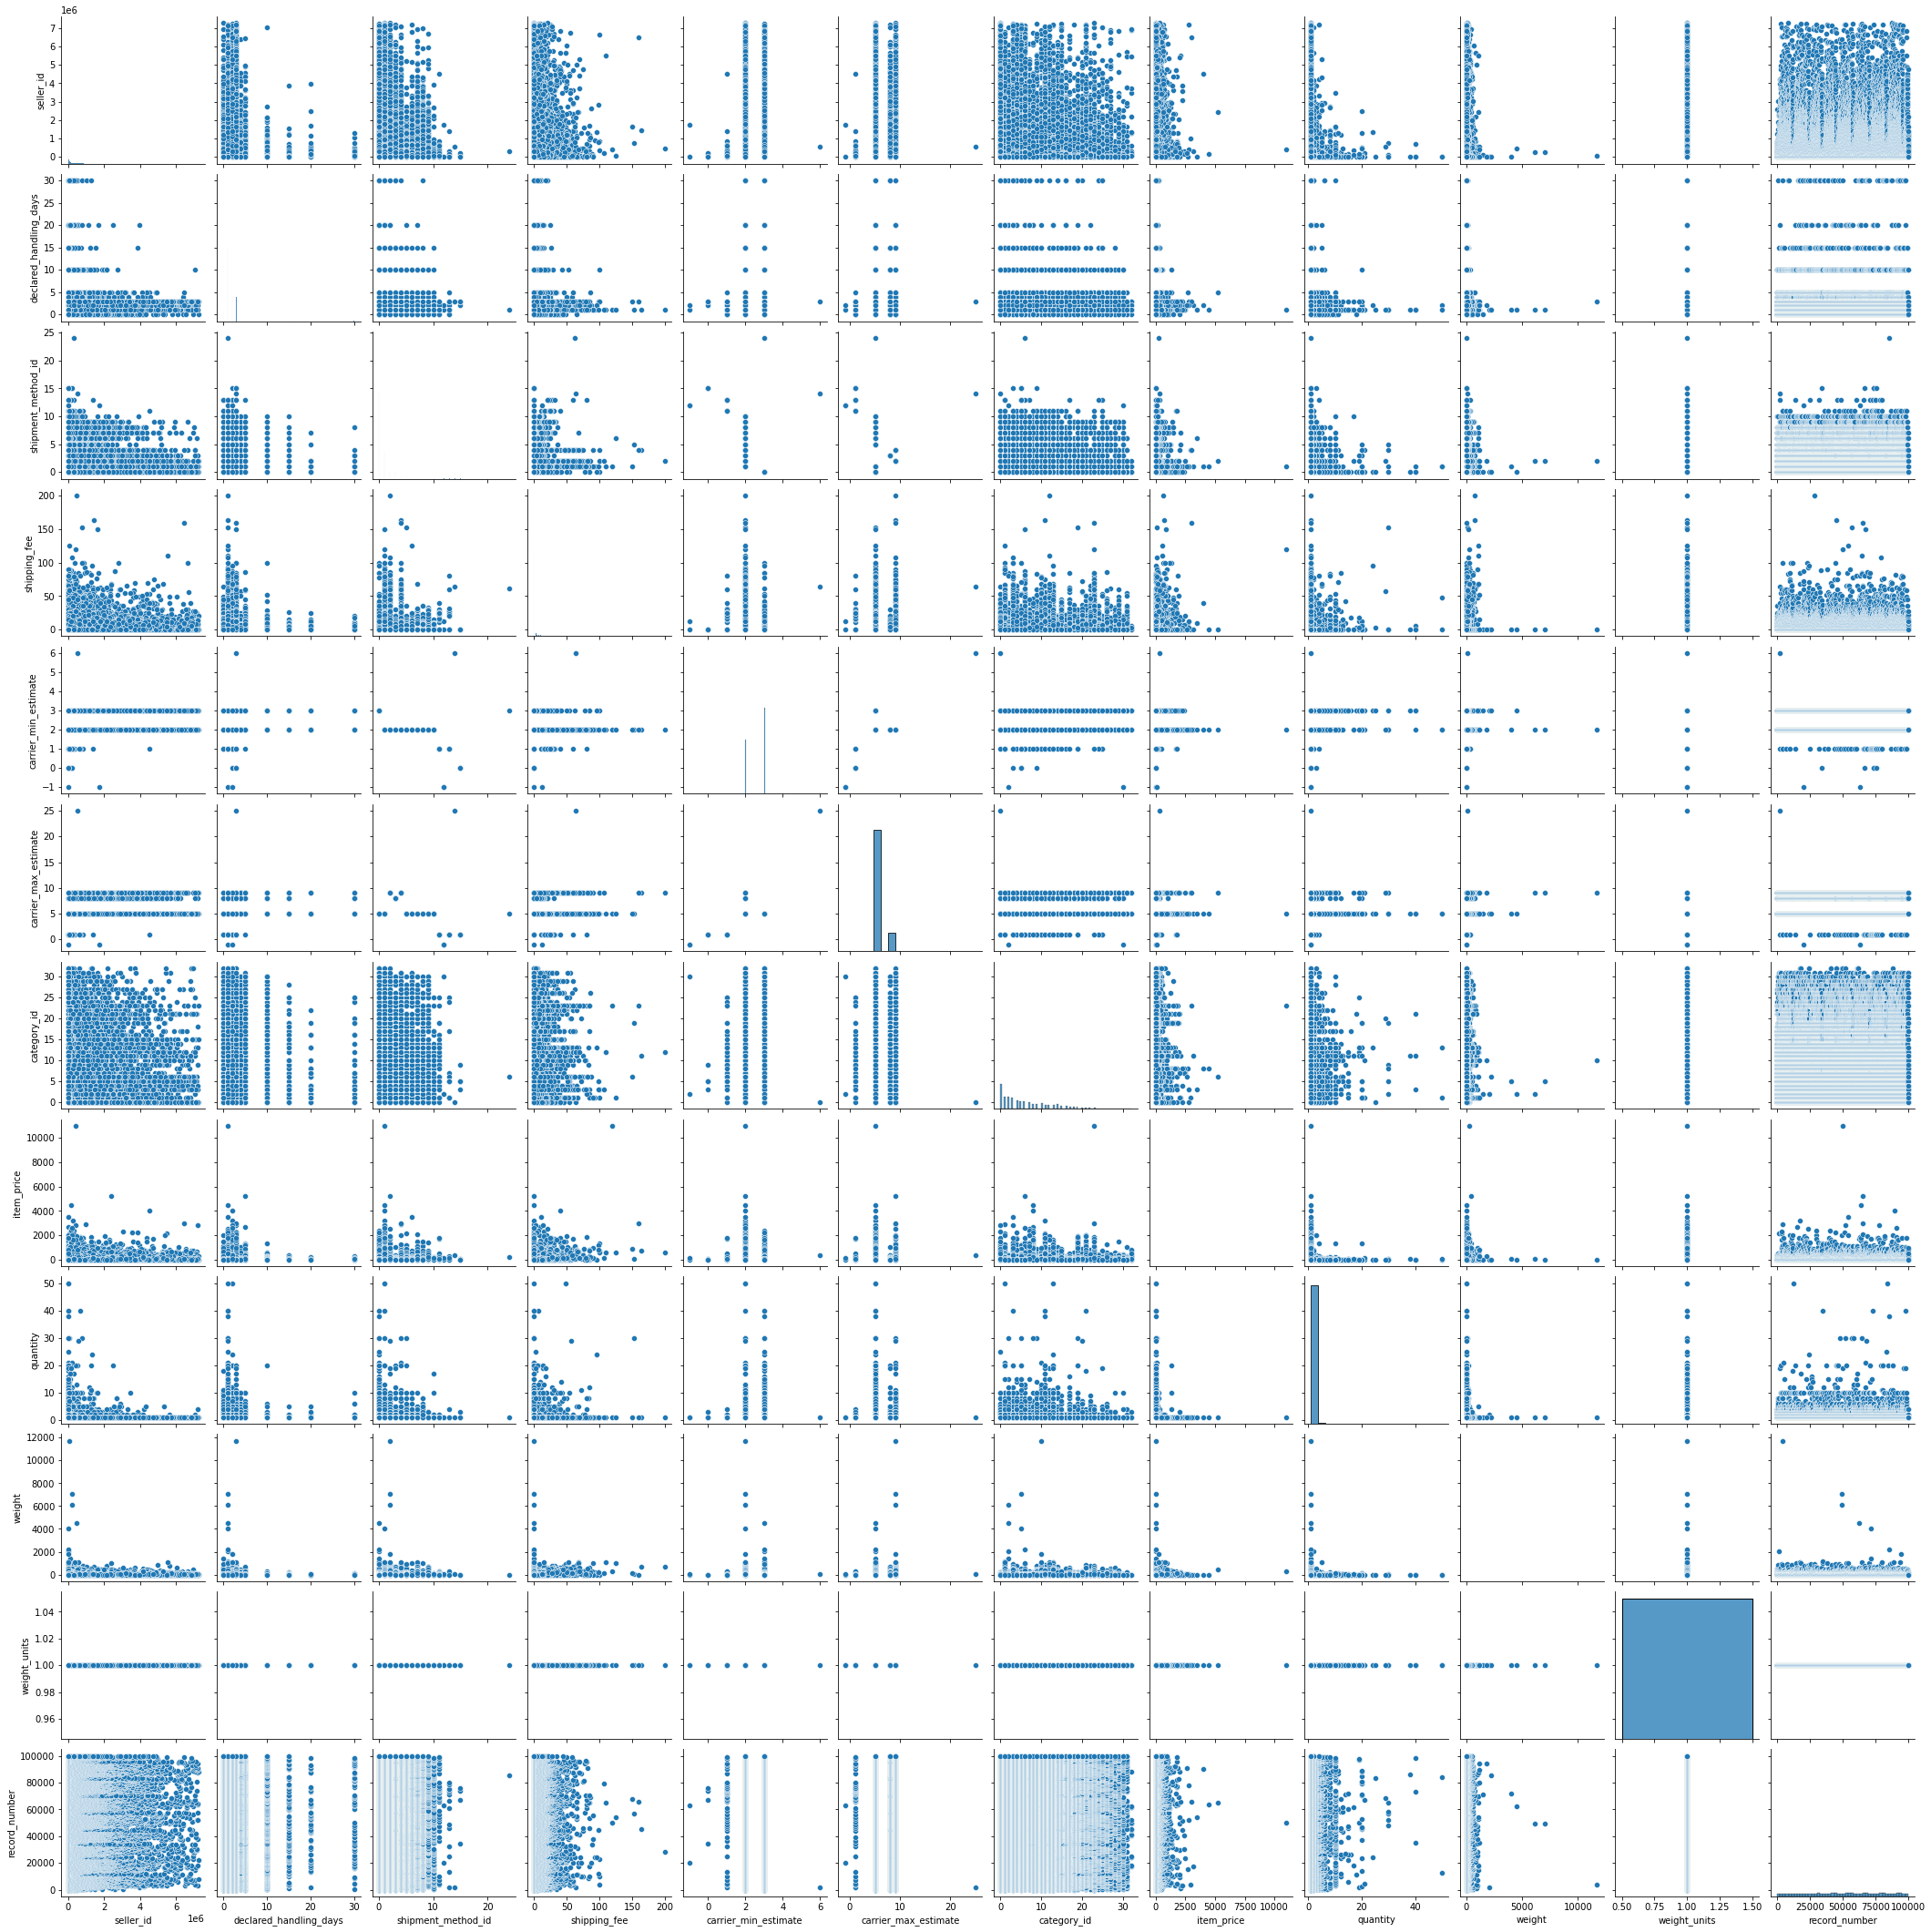

In [119]:
## Drawing the chart for correlation
sns.pairplot(df_copy)

### Descriptive Variable statistics

#### CountPlots: To find the frequency of variables

#### Boxplot: To find the outliers

b2c_c2c


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


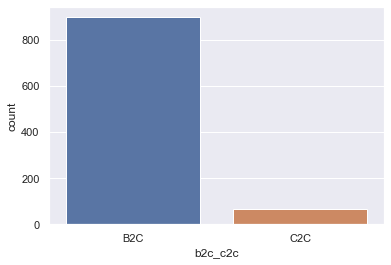

seller_id


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


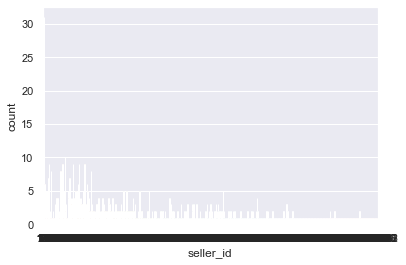

declared_handling_days


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


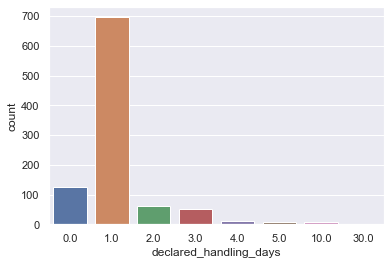

acceptance_scan_timestamp


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


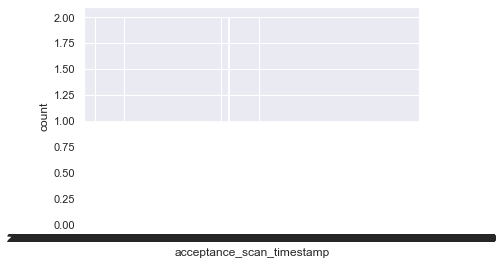

shipment_method_id


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


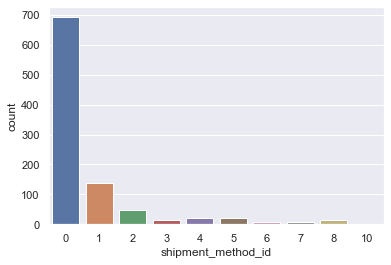

shipping_fee


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


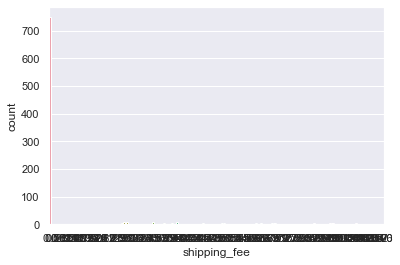

carrier_min_estimate


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


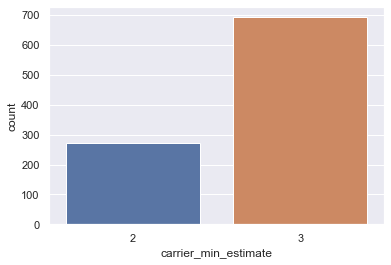

carrier_max_estimate


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


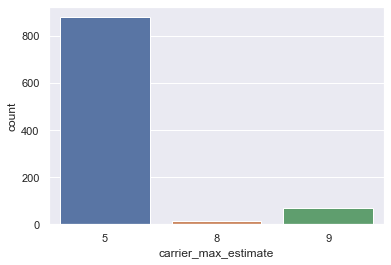

item_zip


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


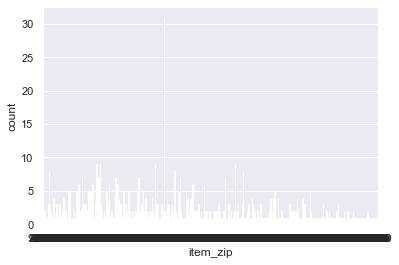

buyer_zip


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


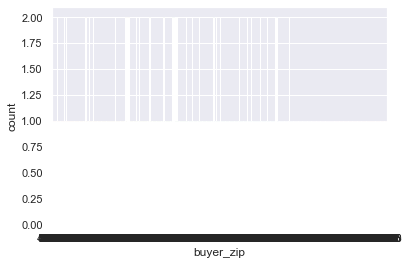

category_id


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


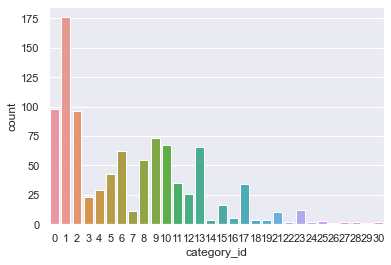

item_price


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


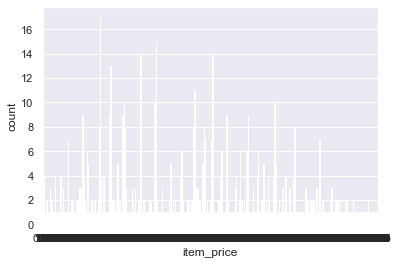

quantity


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


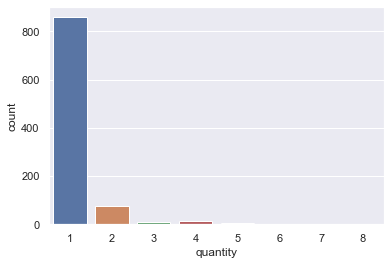

payment_datetime


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


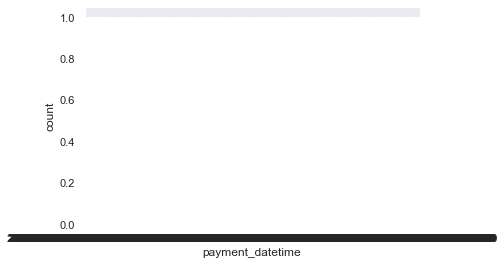

delivery_date


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


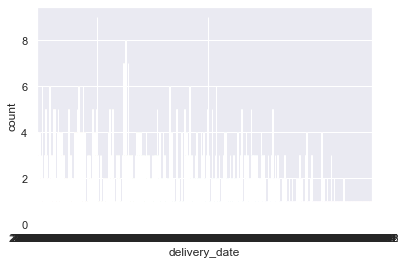

weight


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


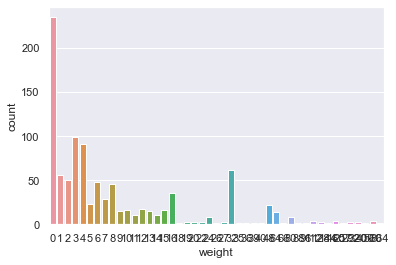

weight_units


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


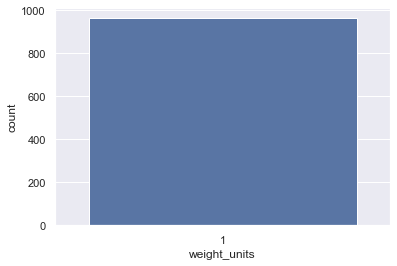

package_size


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


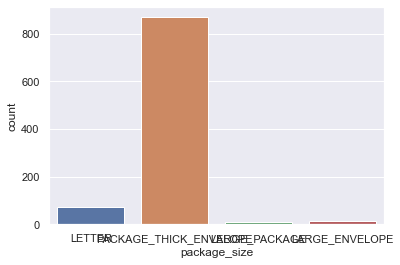

record_number


C:\Users\agraw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


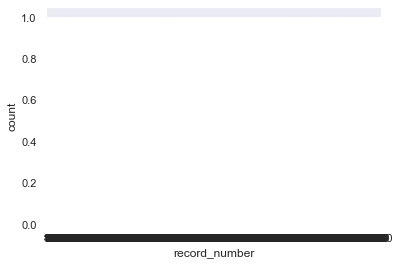

In [146]:
## Drawing countplot for each variable to find the frequency
sns.set(color_codes=True)
for i in df_copy.columns:
    print(i)
    sns.countplot(df_copy[i])
    plt.show()
## Some of the variables: seller_id,accpetance_scan_timestamp,shipping_fee,item_zip,buyer_zip,
##                        item_price, payment_datetime are not depicted correctly using count plot,
##                        as these values have diverse options, and some of them will need to be categoriesed during
##                        feature engineering process.


declared_handling_days


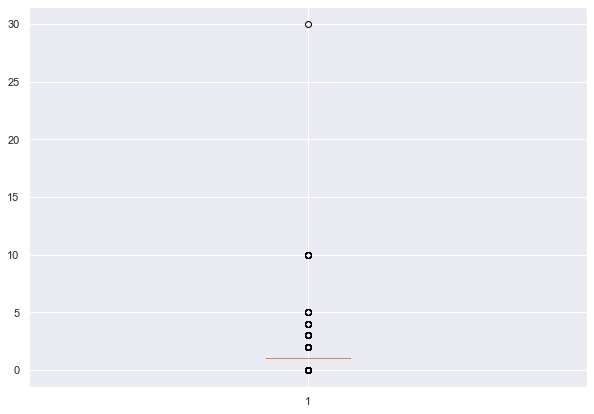

shipment_method_id


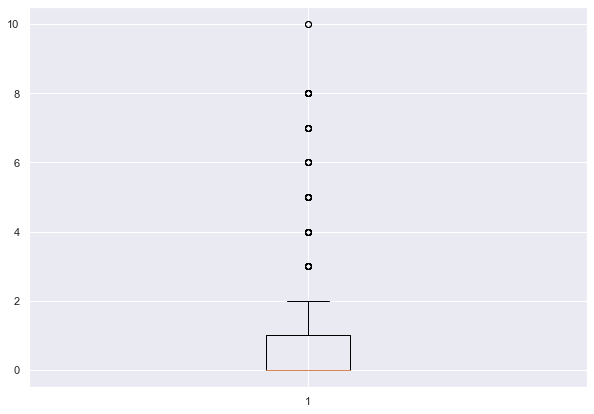

carrier_min_estimate


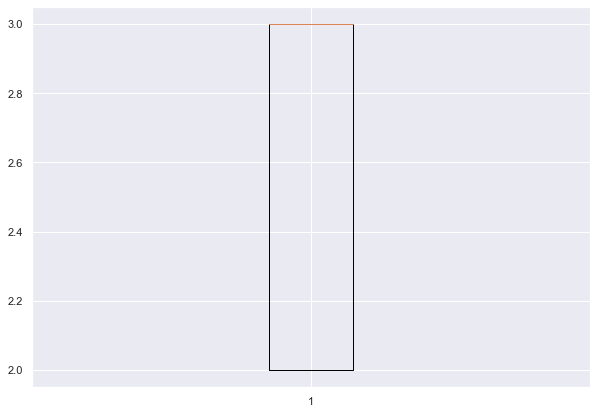

carrier_max_estimate


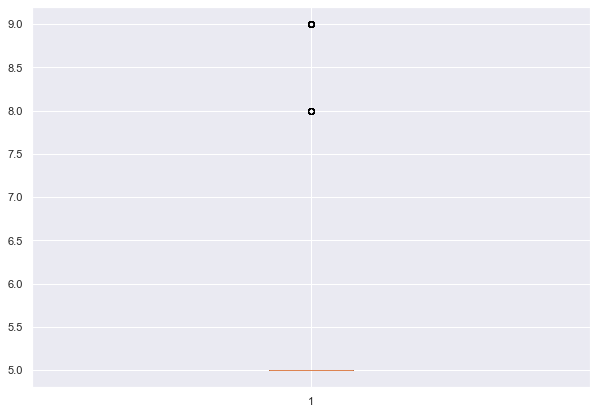

quantity


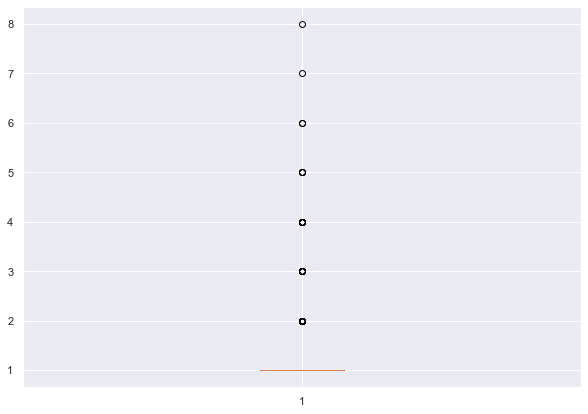

weight


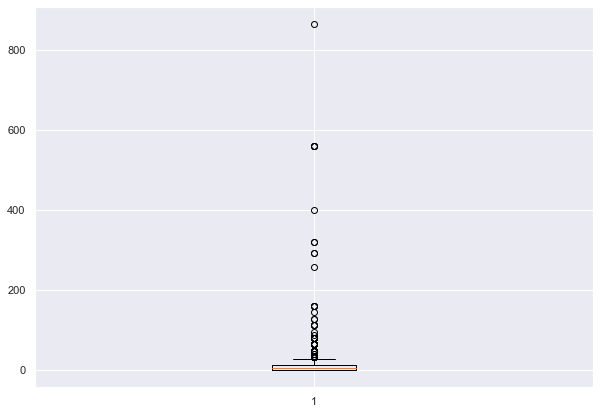

weight_units


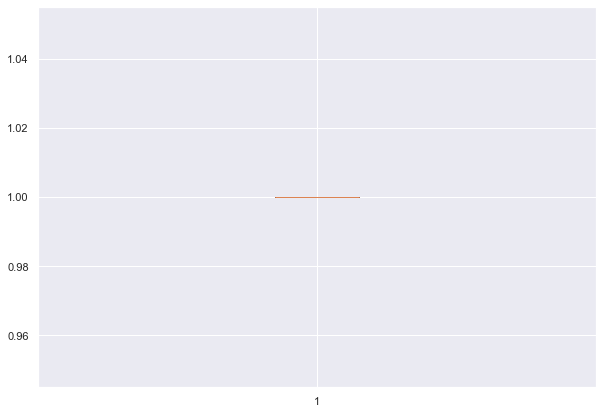

In [91]:
## Boxplot to find out the outliers
outlier_columns=df_copy[['declared_handling_days','shipment_method_id','carrier_min_estimate','carrier_max_estimate','quantity','weight','weight_units']]
for j in outlier_columns:
    print(j)
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(df_copy[j])
    plt.show()

### Feature Engineering

#### Creating a new colum actual_delivery_date = acceptance_timestamp - delivery_date

In [12]:
diff_list = []
for i, row in df_copy.iterrows():
    acc = row['acceptance_scan_timestamp'].split()[0]
    acc_date = dt.strptime(acc, "%Y-%m-%d")
    dd = row['delivery_date'].split()[0]
    dd_date = dt.strptime(dd, "%Y-%m-%d")
    diff = dd_date - acc_date
    nOfDays = diff.days
    diff_list.append(nOfDays)
df_copy['actual_delivery_days'] = diff_list 

<ipython-input-12-f718bfcb75d2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['actual_delivery_days'] = diff_list


In [13]:
df_copy.head(100)
print(df_copy.corr())

                        seller_id  declared_handling_days  shipment_method_id  \
seller_id                1.000000                0.170094            0.072955   
declared_handling_days   0.170094                1.000000            0.058880   
shipment_method_id       0.072955                0.058880            1.000000   
shipping_fee             0.258995                0.129739            0.164273   
carrier_min_estimate    -0.173796               -0.096066           -0.690855   
carrier_max_estimate     0.046591                0.081601            0.402674   
category_id              0.043411                0.046809            0.080130   
item_price               0.158536                0.023672            0.094688   
quantity                -0.027197               -0.014157           -0.014255   
weight                   0.075042                0.018888            0.119628   
weight_units                  NaN                     NaN                 NaN   
record_number            0.0

### Converting Categorical data into dummy variables

In [14]:
## Converting categorical data into dummies
## b2c, shipment id, package size
        
df_dummies=pd.get_dummies(data=df_copy,prefix=['b2c_c2c','shipment_method_id','package_size'],
               columns=['b2c_c2c','shipment_method_id','package_size'],drop_first=True)
df_dummies.head(100)


,seller_id,declared_handling_days,acceptance_scan_timestamp,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,...,shipment_method_id_10,shipment_method_id_11,shipment_method_id_12,shipment_method_id_13,shipment_method_id_14,shipment_method_id_15,shipment_method_id_24,package_size_LARGE_PACKAGE,package_size_LETTER,package_size_PACKAGE_THICK_ENVELOPE
0,25454,3.0,2019-03-26 15:11:00.000-07:00,0.00,3,5,97219,49040,13,27.95,...,0,0,0,0,0,0,0,0,1,0
2,18507,1.0,2019-01-07 16:22:00.000-05:00,4.50,3,5,27292,53010,1,19.90,...,0,0,0,0,0,0,0,0,0,1
3,4677,1.0,2018-12-17 16:56:00.000-08:00,0.00,3,5,90703,80022,1,35.50,...,0,0,0,0,0,0,0,0,0,1
4,4677,1.0,2018-07-27 16:48:00.000-07:00,0.00,3,5,90703,55070,1,25.00,...,0,0,0,0,0,0,0,0,0,1
5,10514,1.0,2019-04-19 19:42:00.000-04:00,0.00,3,5,43215,77063,3,10.39,...,0,0,0,0,0,0,0,0,0,1
6,104,1.0,2019-02-08 17:35:00.000-08:00,0.00,3,5,91304,60565,11,5.70,...,0,0,0,0,0,0,0,0,0,1
7,340356,1.0,2018-04-23 17:31:00.000-04:00,2.95,3,5,49735,29379,1,6.00,...,0,0,0,0,0,0,0,0,0,1
8,113915,5.0,2019-10-12 09:22:00.000-04:00,0.00,2,8,43606,32958,18,5.55,...,0,0,0,0,0,0,0,0,0,1
9,130301,1.0,2019-08-09 11:24:00.000-05:00,0.00,2,5,35117,84776,13,59.98,...,0,0,0,0,0,0,0,0,0,1
10,206,1.0,2019-04-02 19:42:00.000-07:00,0.00,3,5,93309,20774,12,9.64,...,0,0,0,0,0,0,0,0,0,1


In [15]:
print(df_dummies.columns)
print(df_dummies.shape)
print(df_dummies.dtypes)


Index(['seller_id', 'declared_handling_days', 'acceptance_scan_timestamp',
       'shipping_fee', 'carrier_min_estimate', 'carrier_max_estimate',
       'item_zip', 'buyer_zip', 'category_id', 'item_price', 'quantity',
       'payment_datetime', 'delivery_date', 'weight', 'weight_units',
       'record_number', 'actual_delivery_days', 'b2c_c2c_C2C',
       'shipment_method_id_1', 'shipment_method_id_2', 'shipment_method_id_3',
       'shipment_method_id_4', 'shipment_method_id_5', 'shipment_method_id_6',
       'shipment_method_id_7', 'shipment_method_id_8', 'shipment_method_id_9',
       'shipment_method_id_10', 'shipment_method_id_11',
       'shipment_method_id_12', 'shipment_method_id_13',
       'shipment_method_id_14', 'shipment_method_id_15',
       'shipment_method_id_24', 'package_size_LARGE_PACKAGE',
       'package_size_LETTER', 'package_size_PACKAGE_THICK_ENVELOPE'],
      dtype='object')
(97104, 37)
seller_id                                int64
declared_handling_days     

### Standardisation of data 

In [172]:
## declared_handilng_days , shipping_fee , carrie_min_estimate , carrie_max_estimate ,  actual_delivery_days
## Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_dummies[['declared_handling_days','shipping_fee','carrier_min_estimate', 'carrier_max_estimate', 'actual_delivery_days']]=scaler.fit_transform(df_dummies[['declared_handling_days','shipping_fee','carrier_min_estimate', 'carrier_max_estimate', 'actual_delivery_days']])

### Feature Engineering: Binning the target column (Actual_days_dc)

In [16]:
df_dummies['Actual_days_dc']=[1 if 0<=number_of_days<=1 else
                           2 if 1<number_of_days<=3 else
                           4 if 3<number_of_days<=5 else
                           6 if 5<number_of_days<=7 else
                           8 if 7<number_of_days<=9 else
                           10 for number_of_days in list(df_dummies['actual_delivery_days'].values)]

In [17]:
df_dummies.head(10)

,seller_id,declared_handling_days,acceptance_scan_timestamp,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,...,shipment_method_id_11,shipment_method_id_12,shipment_method_id_13,shipment_method_id_14,shipment_method_id_15,shipment_method_id_24,package_size_LARGE_PACKAGE,package_size_LETTER,package_size_PACKAGE_THICK_ENVELOPE,Actual_days_dc
0,25454,3.0,2019-03-26 15:11:00.000-07:00,0.00,3,5,97219,49040,13,27.95,...,0,0,0,0,0,0,0,1,0,2
2,18507,1.0,2019-01-07 16:22:00.000-05:00,4.50,3,5,27292,53010,1,19.90,...,0,0,0,0,0,0,0,0,1,2
3,4677,1.0,2018-12-17 16:56:00.000-08:00,0.00,3,5,90703,80022,1,35.50,...,0,0,0,0,0,0,0,0,1,4
4,4677,1.0,2018-07-27 16:48:00.000-07:00,0.00,3,5,90703,55070,1,25.00,...,0,0,0,0,0,0,0,0,1,2
5,10514,1.0,2019-04-19 19:42:00.000-04:00,0.00,3,5,43215,77063,3,10.39,...,0,0,0,0,0,0,0,0,1,2
6,104,1.0,2019-02-08 17:35:00.000-08:00,0.00,3,5,91304,60565,11,5.70,...,0,0,0,0,0,0,0,0,1,2
7,340356,1.0,2018-04-23 17:31:00.000-04:00,2.95,3,5,49735,29379,1,6.00,...,0,0,0,0,0,0,0,0,1,2
8,113915,5.0,2019-10-12 09:22:00.000-04:00,0.00,2,8,43606,32958,18,5.55,...,0,0,0,0,0,0,0,0,1,2
9,130301,1.0,2019-08-09 11:24:00.000-05:00,0.00,2,5,35117,84776,13,59.98,...,0,0,0,0,0,0,0,0,1,2
10,206,1.0,2019-04-02 19:42:00.000-07:00,0.00,3,5,93309,20774,12,9.64,...,0,0,0,0,0,0,0,0,1,2


### Splitting train and test data

In [18]:
xd=df_dummies[['declared_handling_days','carrier_min_estimate', 'carrier_max_estimate','item_price','quantity','weight','b2c_c2c_C2C',
       'shipment_method_id_1', 'shipment_method_id_2', 'shipment_method_id_3',
       'shipment_method_id_4', 'shipment_method_id_5', 'shipment_method_id_6',
       'shipment_method_id_7', 'shipment_method_id_8', 'shipment_method_id_10',
       'package_size_LARGE_PACKAGE', 'package_size_LETTER',
       'package_size_PACKAGE_THICK_ENVELOPE']]
yd=df_dummies[['Actual_days_dc']]

x_traind,x_testd,y_traind,y_testd= train_test_split(xd,yd,test_size=0.3,random_state=4)

In [19]:
df_dummies['Actual_days_dc'].value_counts()

2     69737
4     17863
6      4513
1      3133
8      1104
10      754
Name: Actual_days_dc, dtype: int64

### k-fold Cross Validation

In [20]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)

In [21]:
y2=np.array(yd).flatten()

In [ ]:
scores = cross_val_score(clf, xd, y2, cv=2)

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

### Regularization using Lasso

In [ ]:
## Dimension REduction / REgularization
for alpha in [0.005, 0.01, 0.05]:
    model = Lasso(alpha=alpha, normalize=True, fit_intercept=False)
    model.fit(x_traind, y_traind)
   
    print("-------------------------------------")
   
    y_predd = model.predict(x_testd)
    mse = mean_squared_error(y_testd, y_predd)
    print("Mean squared error: ", mse)
   
    r_squared = model.score(x_testd, y_testd)
    print("R^2 score on test data: ", r_squared)
   
    r_squared = model.score(x_traind, y_traind)
    print("R^2 score on training data: ", r_squared)
   
    print('model coefficient: ', model.coef_)
   
    print('number of 0 coefficients: ', list(model.coef_).count(0.))

#### Using aplha value .oo5, 9 variable's coefficients are zero, we are going to drop those variables and keep the rest.

## Model Fitting

### Classification Models

#### Logistic Regression

In [254]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [255]:
y_traind=np.array(y_traind).flatten()

In [256]:
modelLog=LogisticRegression(penalty='l2').fit(x_traind,y_traind)


C:\Users\agraw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [257]:
y_pred_log = modelLog.predict(x_testd)
print(y_pred_log)
print("Logistics Model's intercept", modelLog.intercept_)
print('+++++++++++++++++++++++++++++')
print("Logistic Model's coefficient", modelLog.coef_)

[2 2 2 ... 2 2 2]
Logistics Model's intercept [-0.00945952  0.17251948 -0.00369568 -0.04513922 -0.05749136 -0.05673371]
+++++++++++++++++++++++++++++
Logistic Model's coefficient [[ 1.99130708e-02 -3.74045246e-02 -1.43017750e-02 -7.28080828e-04
   2.83153394e-03 -8.10156903e-04  4.68857504e-03  2.70657333e-03
   7.36101175e-03 -2.76621283e-03  3.68135580e-03 -1.45137116e-03
  -4.93845429e-04 -4.38794509e-04 -7.38057406e-04 -3.88076773e-05
   3.19933514e-04  2.71381818e-04 -1.00883863e-02]
 [ 5.63615931e-02  5.24599119e-01  1.05708639e-01  1.13764982e-03
   1.36552310e-01  6.07664914e-04  3.98558644e-02  1.59271365e-01
  -4.66885333e-02 -1.52680343e-01 -2.73850707e-02  2.20343019e-02
   1.46720510e-02  1.03624365e-02  8.28536059e-03  2.38504250e-03
   7.70163489e-04  1.69324259e-02  1.50607596e-01]
 [ 3.25069224e-02  4.67340038e-02  1.87425186e-01  6.93153311e-05
   2.30366473e-02 -9.18605191e-04 -2.65588770e-03 -9.06747390e-02
   6.81432356e-03  5.66540240e-02  1.59679320e-03 -1.160671

#### Visualisation of Logistics Regression's Output

#### Confusion matrix with heat map

Text(33.0, 0.5, 'Condition')

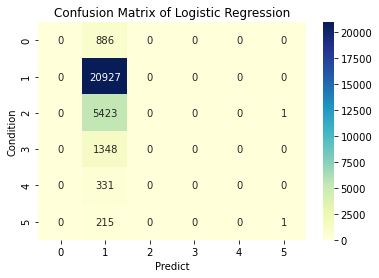

In [269]:
from sklearn.metrics import confusion_matrix
#heatmap of confuciton matrix
ax = sns.heatmap(confusion_matrix(y_testd,y_pred_log), annot=True, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion Matrix of Logistic Regression')
ax.set_xlabel('Predict')
ax.set_ylabel('Condition')

#### Performance Metrics for Logistics Regression

In [259]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [260]:
logistic_accuracy = accuracy_score(y_testd, y_pred_log)

print("Logistic accuracy is: %0.3f" %(logistic_accuracy))

Logistic accuracy is: 0.718


In [263]:
##logit_roc_auc = roc_auc_score(y_testd[1], y_pred_log[1])
##print("Logistic ROC AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_testd, y_pred_log))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       886
           2       0.72      1.00      0.84     20927
           4       0.00      0.00      0.00      5424
           6       0.00      0.00      0.00      1348
           8       0.00      0.00      0.00       331
          10       0.50      0.00      0.01       216

    accuracy                           0.72     29132
   macro avg       0.20      0.17      0.14     29132
weighted avg       0.52      0.72      0.60     29132



C:\Users\agraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier

In [187]:
## Decision Tree classifier

In [188]:
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5,random_state=39).fit(x_traind,y_traind)
y_predict_dTree=dTree.predict(x_testd)

#### Visualisation of Output for decision Tree Classifier

#### Confusion Matrix with heat map

array([[    0,   862,    24,     0,     0,     0],
       [    0, 20473,   454,     0,     0,     0],
       [    0,  4852,   572,     0,     0,     0],
       [    0,   936,   412,     0,     0,     0],
       [    0,   230,   101,     0,     0,     0],
       [    0,   161,    55,     0,     0,     0]], dtype=int64)

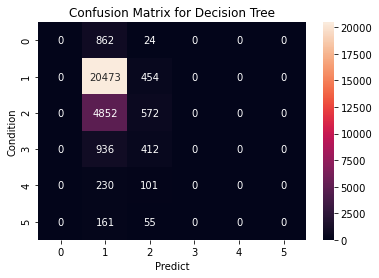

In [266]:
ax=sns.heatmap(confusion_matrix(y_testd,y_predict_dTree),annot=True, fmt="d")
ax.set_title("Confusion Matrix for Decision Tree")
ax.set_xlabel("Predict")
ax.set_ylabel("Condition")

#### Performance Metrics for decision Tree Classifier

####     1) Accuracy Score
####     2) Classification report

In [190]:
dTree_accuracy_score=accuracy_score(y_testd,y_predict_dTree)
##dTree_roc_auc=roc_auc_score(y_testd,y_predict_dTree)
dTree_classificationReport=classification_report(y_testd,y_predict_dTree)
print("The accuracy score is: %0.4f"%(dTree_accuracy_score))
##print("The roc_auc_score is:",dTree_roc_auc)
print("The classification report is:",dTree_classificationReport)

The accuracy score is: 0.7224
The classification report is:               precision    recall  f1-score   support

           1       0.00      0.00      0.00       886
           2       0.74      0.98      0.85     20927
           4       0.35      0.11      0.16      5424
           6       0.00      0.00      0.00      1348
           8       0.00      0.00      0.00       331
          10       0.00      0.00      0.00       216

    accuracy                           0.72     29132
   macro avg       0.18      0.18      0.17     29132
weighted avg       0.60      0.72      0.64     29132



C:\Users\agraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Bagging Classifier

In [191]:
from sklearn.ensemble import BaggingClassifier

In [192]:
dTreeNew=DecisionTreeClassifier(criterion = 'gini', random_state=42).fit(x_traind,y_traind)

In [193]:
bgcl=BaggingClassifier(base_estimator=dTreeNew,n_estimators=500,max_samples=100,bootstrap=True, n_jobs=-1,random_state=42).fit(x_traind,y_traind)
y_predict_bgcl=bgcl.predict(x_testd)

#### Visualisation for Bagging Classifier

##### Confusion Matrix with heat map

Text(33.0, 0.5, 'Condition')

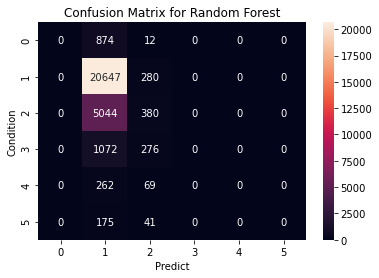

In [265]:
ax=sns.heatmap(confusion_matrix(y_testd,y_predict_bgcl),annot=True, fmt="d")
ax.set_title("Confusion Matrix for Random Forest")
ax.set_xlabel("Predict")
ax.set_ylabel("Condition")


#### Performance Metrics for Bagging Classifier

####     1) Accuracy Score
####     2) roc_auc_curve
####     3) Classification report

In [195]:
y_predict_bgcl=bgcl.predict(x_testd)
dTreeNew_accuracy_score3=accuracy_score(y_testd,y_predict_bgcl)
##dTreeNew_roc_auc3=roc_auc_score(y_testd,y_predict_bgcl)
dTreeNew_classificationReport3=classification_report(y_testd,y_predict_bgcl)
print("The accuracy score is: %0.4f"%(dTreeNew_accuracy_score3))
##print("The roc_auc_score is:",dTreeNew_roc_auc3)
print("The classification report is:",dTreeNew_classificationReport3)

The accuracy score is: 0.7218
The classification report is:               precision    recall  f1-score   support

           1       0.00      0.00      0.00       886
           2       0.74      0.99      0.84     20927
           4       0.36      0.07      0.12      5424
           6       0.00      0.00      0.00      1348
           8       0.00      0.00      0.00       331
          10       0.00      0.00      0.00       216

    accuracy                           0.72     29132
   macro avg       0.18      0.18      0.16     29132
weighted avg       0.60      0.72      0.63     29132



C:\Users\agraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agraw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Boosting Model

### CatBoost

In [274]:
from catboost import CatBoostRegressor
import numpy as np

In [275]:
# DATA CLEANING 
# dataset = pd.read_csv('/raid/cs152/eBay/eBay_ML_Challenge_Dataset_2021_train.csv')
dataset = pd.read_csv('C:\\SJSUDocs\\CS171IntroTo MI\\Project\\eBay_ML_Challenge_Dataset_2021\\train.tsv',sep = '\t',nrows=20000)

In [276]:
dum=pd.get_dummies(data=dataset,columns=["b2c_c2c","shipment_method_id", "category_id","package_size"])
dataset = pd.concat([dataset[["b2c_c2c","shipment_method_id", "category_id","package_size"]], dum.set_index(dataset.index)], axis=1)


In [277]:
d_days = []
h_days = []
tot_d_days = []
for i, row in dataset.iterrows():
    acc = row['acceptance_scan_timestamp'].split()[0]
    acc_date = dt.strptime(acc, "%Y-%m-%d")
    dd = row['delivery_date'].split()[0]
    dd_date = dt.strptime(dd, "%Y-%m-%d")
    payment_date = row['payment_datetime'].split()[0]
    p_date = dt.strptime(payment_date, "%Y-%m-%d")
    shipping_days = (dd_date - acc_date).days
    handling_days = (acc_date - p_date).days
    tot_delivery_days = (dd_date - p_date).days
    d_days.append(shipping_days)
    h_days.append(handling_days)
    tot_d_days.append(tot_delivery_days)
dataset['actual_delivery_days'] = d_days 
dataset['handling_days'] = h_days 
dataset['total_delivery_days'] = tot_d_days

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
dataset[['declared_handling_days','shipping_fee','carrier_min_estimate', 'carrier_max_estimate', 'actual_delivery_days', 'handling_days', 'total_delivery_days' ]] = scaler.fit_transform(dataset[['declared_handling_days','shipping_fee','carrier_min_estimate', 'carrier_max_estimate', 'actual_delivery_days', 'handling_days', 'total_delivery_days']])

In [278]:
features = dataset[["b2c_c2c_C2C", "seller_id", "declared_handling_days", "shipment_method_id", "shipping_fee",
                    "carrier_min_estimate", "carrier_max_estimate", "item_zip", "buyer_zip", "category_id", "item_price",
                   "weight", "quantity", "package_size", "handling_days"]]

labels = np.array(dataset["total_delivery_days"])

In [279]:
X = features
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [280]:
CAT_FEATURES = [0, 3, 7, 8, 9, 13] # b2c_c2c, shipment_method_id, item_zip, buyer_zip, category_id, package_size

model = CatBoostRegressor(iterations=100,
                                   cat_features = CAT_FEATURES,
                                   early_stopping_rounds=10)
# train model
model.fit(X_train, y_train, 
                   eval_set = (X_test, y_test),
                   plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.317353
0:	learn: 0.0284257	test: 0.0276902	best: 0.0276902 (0)	total: 71.1ms	remaining: 7.04s
1:	learn: 0.0244930	test: 0.0239650	best: 0.0239650 (1)	total: 97.9ms	remaining: 4.8s
2:	learn: 0.0222520	test: 0.0216566	best: 0.0216566 (2)	total: 124ms	remaining: 4.01s
3:	learn: 0.0206358	test: 0.0200292	best: 0.0200292 (3)	total: 153ms	remaining: 3.66s
4:	learn: 0.0194789	test: 0.0188671	best: 0.0188671 (4)	total: 181ms	remaining: 3.43s
5:	learn: 0.0187099	test: 0.0182659	best: 0.0182659 (5)	total: 208ms	remaining: 3.26s
6:	learn: 0.0182458	test: 0.0178921	best: 0.0178921 (6)	total: 233ms	remaining: 3.1s
7:	learn: 0.0178666	test: 0.0175456	best: 0.0175456 (7)	total: 258ms	remaining: 2.97s
8:	learn: 0.0175920	test: 0.0172904	best: 0.0172904 (8)	total: 285ms	remaining: 2.88s
9:	learn: 0.0173880	test: 0.0171322	best: 0.0171322 (9)	total: 307ms	remaining: 2.76s
10:	learn: 0.0172555	test: 0.0170530	best: 0.0170530 (10)	total: 331ms	remaining: 2.68s
11:	learn: 0.0171892	t

#### Performance Matrix for CatBoostRegressor

In [282]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("test score: " + str(test_score))
print("train score: " + str(train_score))
pred = model.predict(X_test)
print("Mean Square Error is:",mean_squared_error(pred,y_test))
print(dataset.columns)

test score: 0.7509054533032724
train score: 0.7787762299587612
Mean Square Error is: 0.00027415882492824826
Index(['b2c_c2c', 'shipment_method_id', 'category_id', 'package_size',
       'seller_id', 'declared_handling_days', 'acceptance_scan_timestamp',
       'shipping_fee', 'carrier_min_estimate', 'carrier_max_estimate',
       'item_zip', 'buyer_zip', 'item_price', 'quantity', 'payment_datetime',
       'delivery_date', 'weight', 'weight_units', 'record_number',
       'b2c_c2c_B2C', 'b2c_c2c_C2C', 'shipment_method_id_0',
       'shipment_method_id_1', 'shipment_method_id_2', 'shipment_method_id_3',
       'shipment_method_id_4', 'shipment_method_id_5', 'shipment_method_id_6',
       'shipment_method_id_7', 'shipment_method_id_8', 'shipment_method_id_9',
       'shipment_method_id_10', 'shipment_method_id_11',
       'shipment_method_id_12', 'shipment_method_id_13',
       'shipment_method_id_14', 'category_id_0', 'category_id_1',
       'category_id_2', 'category_id_3', 'category_i

### Linear Regression

In [283]:
dataset.dropna(inplace=True)
X = dataset[['declared_handling_days',
       'shipping_fee', 'carrier_min_estimate', 'carrier_max_estimate','item_price',
        'weight', 'b2c_c2c_C2C',
       'shipment_method_id_1','shipment_method_id_3',
       'shipment_method_id_4',
       'shipment_method_id_12',
       'shipment_method_id_14', 'category_id_0', 'category_id_1', 'category_id_7', 'category_id_9', 'category_id_19', 'category_id_26', 'package_size_NONE',
       'handling_days']]
y = np.array(dataset[["total_delivery_days"]])


In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [285]:
from sklearn.linear_model import LinearRegression

dataset.dropna(inplace=True)
X = dataset[['package_size','declared_handling_days',
       'shipping_fee', 'carrier_min_estimate', 'carrier_max_estimate',
       'item_price', 'quantity', 'weight', 'b2c_c2c_C2C', 'shipment_method_id_0',
       'shipment_method_id_1', 'shipment_method_id_2', 'shipment_method_id_3',
       'shipment_method_id_4', 'shipment_method_id_5', 'shipment_method_id_6',
       'shipment_method_id_7', 'shipment_method_id_8', 'shipment_method_id_9',
       'shipment_method_id_10', 'shipment_method_id_11',
       'shipment_method_id_12', 'shipment_method_id_13',
       'shipment_method_id_14', 'category_id_0', 'category_id_1',
       'category_id_2', 'category_id_3', 'category_id_4', 'category_id_5',
       'category_id_6', 'category_id_7', 'category_id_8', 'category_id_9',
       'category_id_10', 'category_id_11', 'category_id_12', 'category_id_13',
       'category_id_14', 'category_id_15', 'category_id_16', 'category_id_17',
       'category_id_18', 'category_id_19', 'category_id_20', 'category_id_21',
       'category_id_22', 'category_id_23', 'category_id_24', 'category_id_25',
       'category_id_26', 'category_id_27', 'category_id_28', 'category_id_29',
       'category_id_30', 'category_id_31', 'category_id_32',
       'package_size_LARGE_ENVELOPE', 'package_size_LARGE_PACKAGE',
       'package_size_LETTER', 'package_size_NONE',
       'package_size_PACKAGE_THICK_ENVELOPE',
       'handling_days']]
y = np.array(dataset[["total_delivery_days"]])

model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
print("train score: " + str(train_score))
test_score = model.score(X_test, y_test)
print("test score: " + str(test_score))
pred = model.predict(X_test)
print("Mean Square Error is:",mean_squared_error(pred,y_test))

train score: 0.744945258052752
test score: 0.7390547857390024
Mean Square Error is: 0.00033753168149889694


#### Performance Matrix for Linear Regression

#### 1) MSE
#### 2) OLS
#### 3) ANOVA

In [207]:
from statsmodels.formula.api import ols
multilinear_model = ols("total_delivery_days ~ package_size+declared_handling_days+shipping_fee+carrier_min_estimate+carrier_max_estimate+item_price+quantity+weight+b2c_c2c_C2C+shipment_method_id_0+shipment_method_id_1+shipment_method_id_2+shipment_method_id_3+shipment_method_id_4+shipment_method_id_5+shipment_method_id_6+shipment_method_id_7+shipment_method_id_8+shipment_method_id_9+shipment_method_id_10+shipment_method_id_11+shipment_method_id_12+shipment_method_id_13+shipment_method_id_14+category_id_0+category_id_1+category_id_2+category_id_3+category_id_4+category_id_5+category_id_6+category_id_7+category_id_8+category_id_9+category_id_10+category_id_11+category_id_12+category_id_13+category_id_14+category_id_15+category_id_16+category_id_17+category_id_18+category_id_19+category_id_20+category_id_21+category_id_22+category_id_23+category_id_24+category_id_25+category_id_26+category_id_27+category_id_28+category_id_29+category_id_30+category_id_31+category_id_32+package_size_LARGE_ENVELOPE+package_size_LARGE_PACKAGE+package_size_LETTER+package_size_NONE+package_size_PACKAGE_THICK_ENVELOPE+handling_days", dataset).fit()
summary = multilinear_model.summary();
print(summary)

                             OLS Regression Results                            
Dep. Variable:     total_delivery_days   R-squared:                       0.744
Model:                             OLS   Adj. R-squared:                  0.744
Method:                  Least Squares   F-statistic:                     966.5
Date:                 Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                         21:06:23   Log-Likelihood:                 50144.
No. Observations:                18965   AIC:                        -1.002e+05
Df Residuals:                    18907   BIC:                        -9.972e+04
Df Model:                           57                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [208]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(multilinear_model)
print(anova_results)

# Using OLS result compare significance
pvalues = multilinear_model.pvalues
threshold = 0.1
print("\n\nFollowing variables are not significant: ")
print(pvalues[pvalues > threshold])

                                          df        sum_sq       mean_sq  \
package_size                             4.0  1.036540e-01  2.591349e-02   
declared_handling_days                   1.0  1.510062e+00  1.510062e+00   
shipping_fee                             1.0  1.252736e-02  1.252736e-02   
carrier_min_estimate                     1.0  7.001684e-03  7.001684e-03   
carrier_max_estimate                     1.0  2.776938e-01  2.776938e-01   
item_price                               1.0  1.505059e-03  1.505059e-03   
quantity                                 1.0  3.475054e-05  3.475054e-05   
weight                                   1.0  1.908525e-05  1.908525e-05   
b2c_c2c_C2C                              1.0  7.587898e-04  7.587898e-04   
shipment_method_id_0                     1.0  2.915829e-02  2.915829e-02   
shipment_method_id_1                     1.0  1.104966e-03  1.104966e-03   
shipment_method_id_2                     1.0  1.319744e-01  1.319744e-01   
shipment_met